In [1]:
# %%capture
#!pip install -r ../requirements.txt

In [2]:
import torch
from PIL import Image, ImageDraw
from grad_cam import get_region
from utils import maximal_rectangle, new_center
from utils import CanvasTemplate
from florence_detection import florence_caption
import matplotlib.pyplot as plt
from sd_inpaint import extend_image, Inpainting

c:\Users\peber\miniconda3\envs\pencil\lib\site-packages\diffusers\models\vq_model.py:20: FutureWarning: `VQEncoderOutput` is deprecated and will be removed in version 0.31. Importing `VQEncoderOutput` from `diffusers.models.vq_model` is deprecated and this will be removed in a future version. Please use `from diffusers.models.autoencoders.vq_model import VQEncoderOutput`, instead.
  deprecate("VQEncoderOutput", "0.31", deprecation_message)
c:\Users\peber\miniconda3\envs\pencil\lib\site-packages\diffusers\models\vq_model.py:25: FutureWarning: `VQModel` is deprecated and will be removed in version 0.31. Importing `VQModel` from `diffusers.models.vq_model` is deprecated and this will be removed in a future version. Please use `from diffusers.models.autoencoders.vq_model import VQModel`, instead.
  deprecate("VQModel", "0.31", deprecation_message)


In [3]:
# input
input_images_list = [
    "../input/ad_2.jpg",
    "../input/ad_3.webp",
]
captions = {
    0: [
        "get the latest fashion trend",
        "Perfect shoes for every occasion",
        "cap on the head",
    ],
    1: ["Don't stop play", "Drink more, Drink better", "Master Chief"],
}
canvas_templates = [
    CanvasTemplate(
        canvas_size=((0, 0), (1024, 1024)),
        elements=[((0, 0), (1024, 300)), ((720, 0), (1024, 1024))],
    ),
    CanvasTemplate(
        canvas_size=((0, 0), (1024, 768)),
        elements=[((0, 0), (1024, 100)), ((0, 650), (1024, 768))],
    ),
    CanvasTemplate(
        canvas_size=((0, 0), (1024, 1024)),
        elements=[
            ((0, 0), (1024, 200)),
            ((0, 0), (200, 1024)),
            ((820, 0), (1024, 1024)),
            ((0, 820), (1024, 1024)),
        ],
    ),
]

# parameters
clip_arch = "RN50"
saliency_layer = "layer4"
blur = False
device = "cuda" if torch.cuda.is_available() else "cpu"

# SD inpaint model
impaint_model = Inpainting()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'decay': 0.9999, 'inv_gamma': 1.0, 'min_decay': 0.0, 'optimization_step': 37000, 'power': 0.6666666666666666, 'update_after_step': 0, 'use_ema_warmup': False} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


c:\Users\peber\miniconda3\envs\pencil\lib\site-packages\torch\nn\functional.py:5504: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)
c:\Users\peber\miniconda3\envs\pencil\lib\site-packages\torch\autograd\graph.py:744: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at ..\aten\src\ATen\cuda\CublasHandlePool.cpp:135.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
You are using Florence-2 without a text prompt.


  0%|          | 0/25 [00:00<?, ?it/s]

image: ../input/ad_2.jpg, caption: get the latest fashion trend, florence_caption: young man in blue puffer jacket and ripped jeans posing in front of brick wallyoung man wearing blue puffy jacket and white sneakers with graffiti print t-shirttrousers


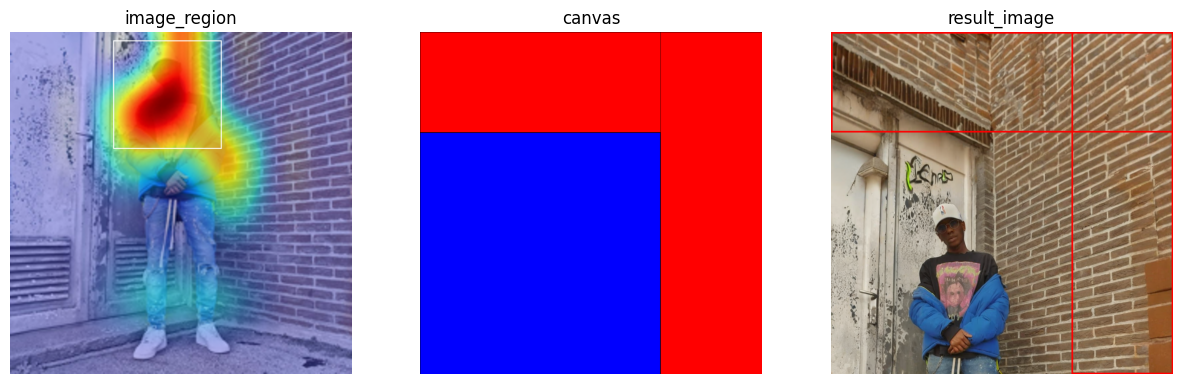

  0%|          | 0/25 [00:00<?, ?it/s]

image: ../input/ad_2.jpg, caption: get the latest fashion trend, florence_caption: young man in blue puffer jacket and ripped jeans posing in front of brick wallyoung man wearing blue puffy jacket and white sneakers with graffiti print t-shirttrousers


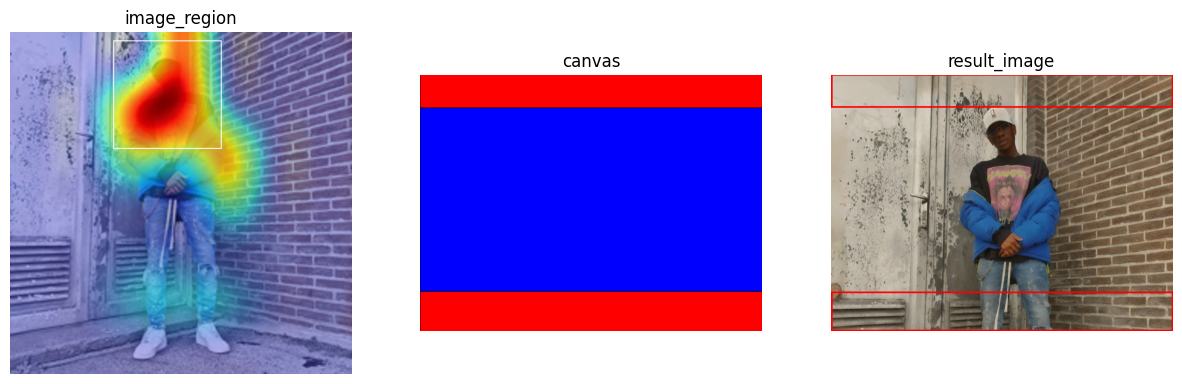

  0%|          | 0/25 [00:00<?, ?it/s]

image: ../input/ad_2.jpg, caption: get the latest fashion trend, florence_caption: young man in blue puffer jacket and ripped jeans posing in front of brick wallyoung man wearing blue puffy jacket and white sneakers with graffiti print t-shirttrousers


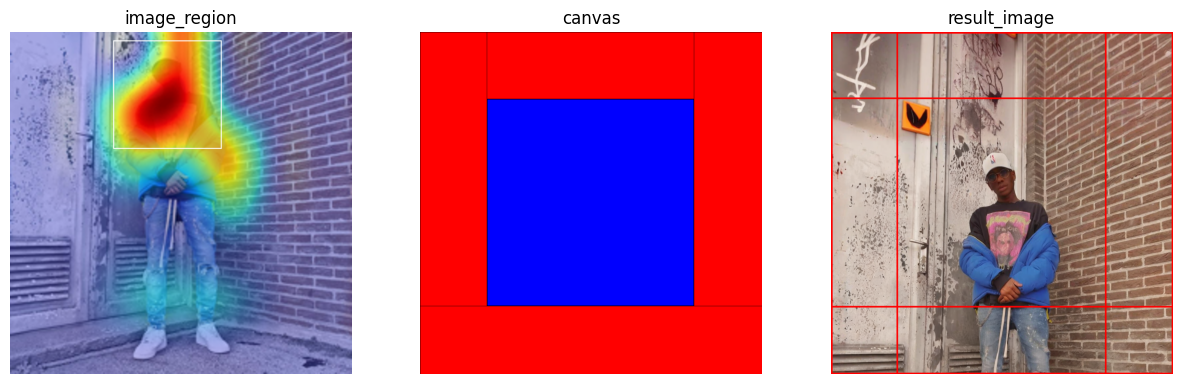

  0%|          | 0/25 [00:00<?, ?it/s]

image: ../input/ad_2.jpg, caption: Perfect shoes for every occasion, florence_caption: young man in blue puffer jacket and ripped jeans posing in front of brick wallyoung man wearing blue puffy jacket and white sneakers with graffiti print t-shirttrousers


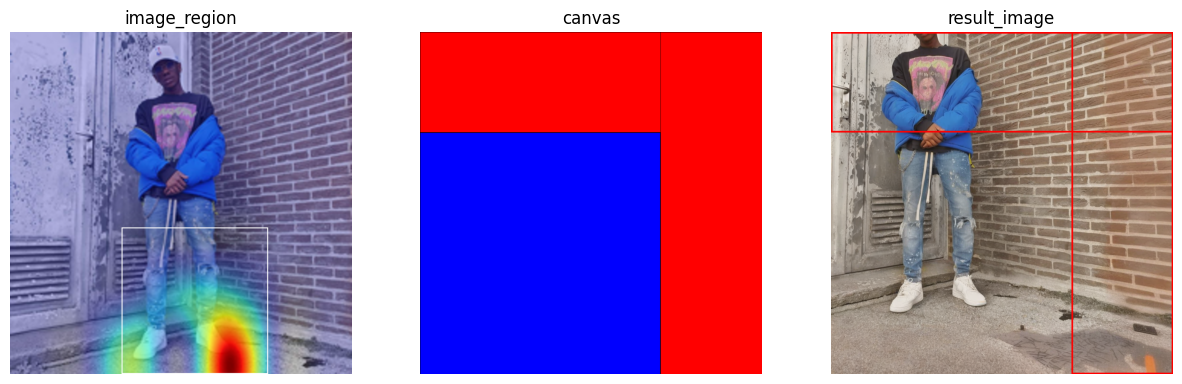

  0%|          | 0/25 [00:00<?, ?it/s]

image: ../input/ad_2.jpg, caption: Perfect shoes for every occasion, florence_caption: young man in blue puffer jacket and ripped jeans posing in front of brick wallyoung man wearing blue puffy jacket and white sneakers with graffiti print t-shirttrousers


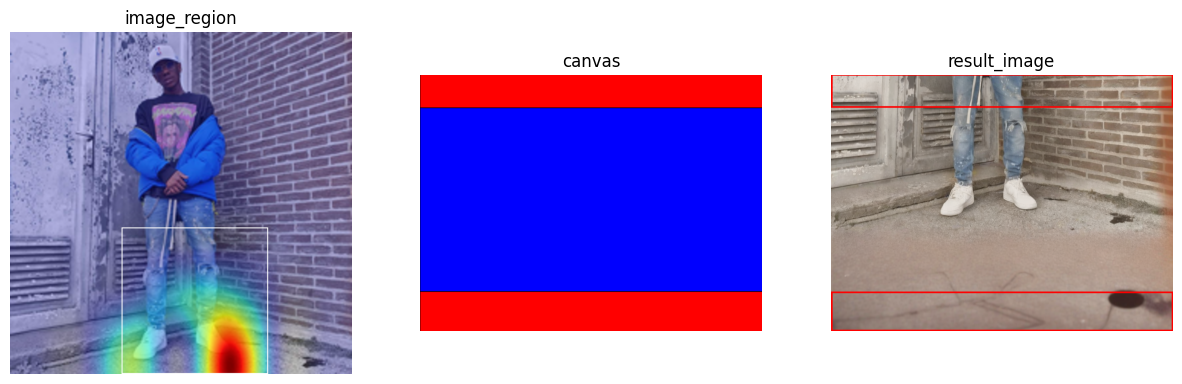

  0%|          | 0/25 [00:00<?, ?it/s]

image: ../input/ad_2.jpg, caption: Perfect shoes for every occasion, florence_caption: young man in blue puffer jacket and ripped jeans posing in front of brick wallyoung man wearing blue puffy jacket and white sneakers with graffiti print t-shirttrousers


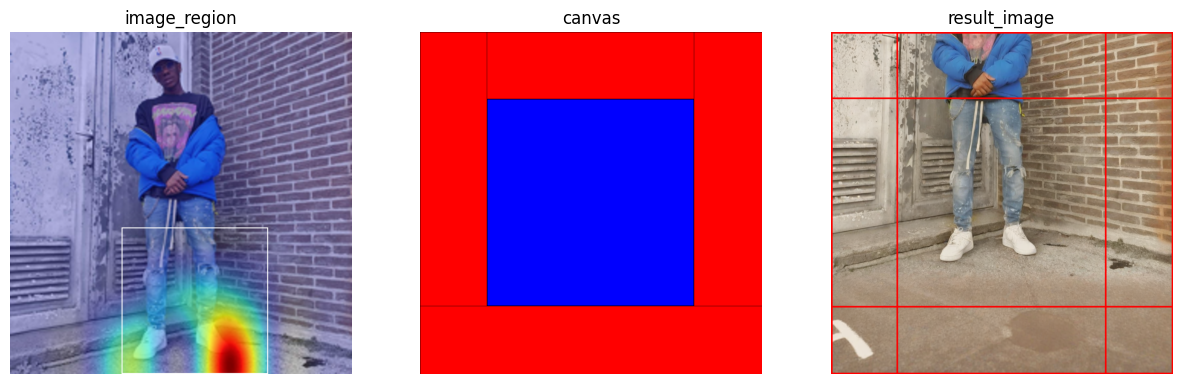

  0%|          | 0/25 [00:00<?, ?it/s]

image: ../input/ad_2.jpg, caption: cap on the head, florence_caption: young man in blue puffer jacket and ripped jeans posing in front of brick wallyoung man wearing blue puffy jacket and white sneakers with graffiti print t-shirttrousers


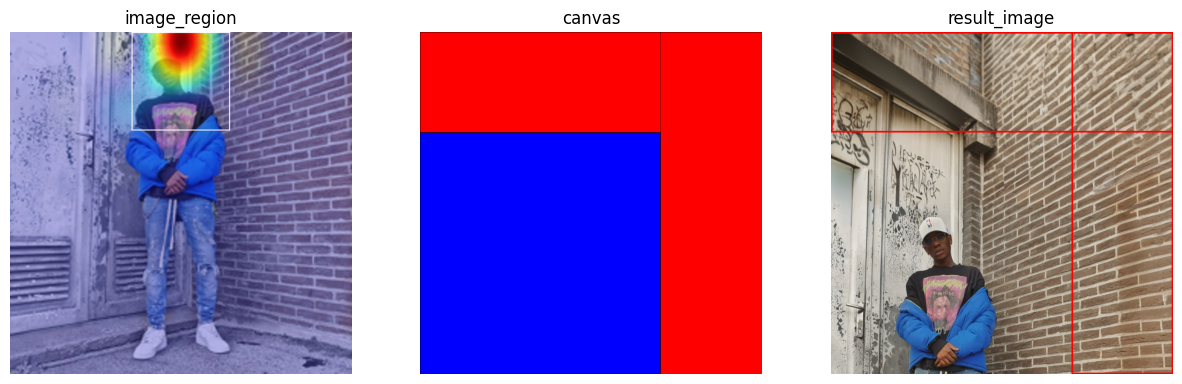

  0%|          | 0/25 [00:00<?, ?it/s]

image: ../input/ad_2.jpg, caption: cap on the head, florence_caption: young man in blue puffer jacket and ripped jeans posing in front of brick wallyoung man wearing blue puffy jacket and white sneakers with graffiti print t-shirttrousers


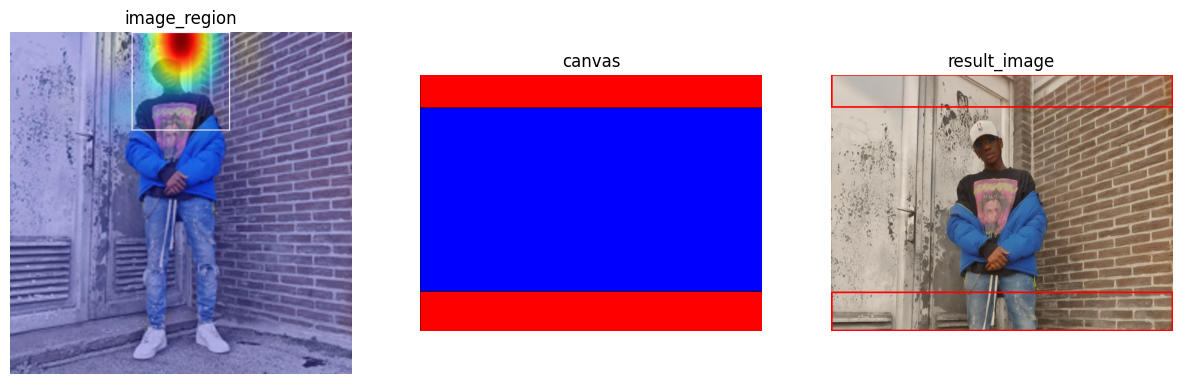

  0%|          | 0/25 [00:00<?, ?it/s]

image: ../input/ad_2.jpg, caption: cap on the head, florence_caption: young man in blue puffer jacket and ripped jeans posing in front of brick wallyoung man wearing blue puffy jacket and white sneakers with graffiti print t-shirttrousers


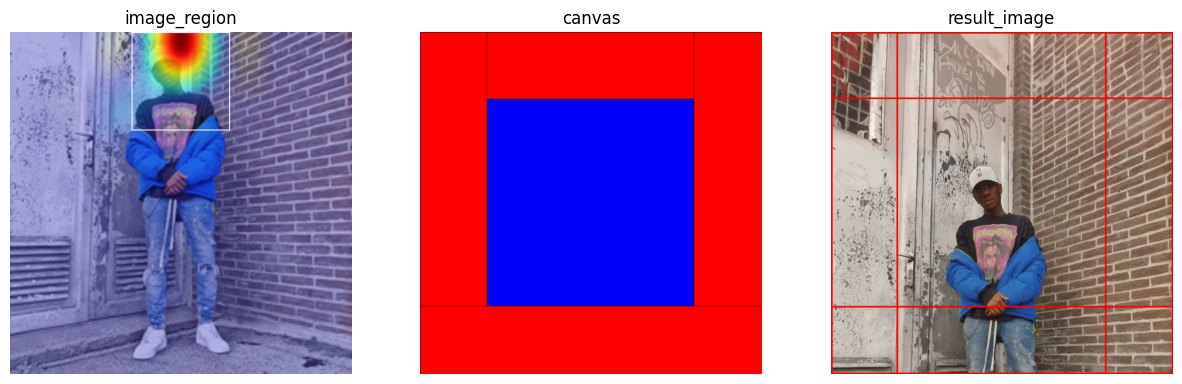

  0%|          | 0/25 [00:00<?, ?it/s]

image: ../input/ad_3.webp, caption: Don't stop play, florence_caption: Halo Infinite Monster Energy drink dispenser


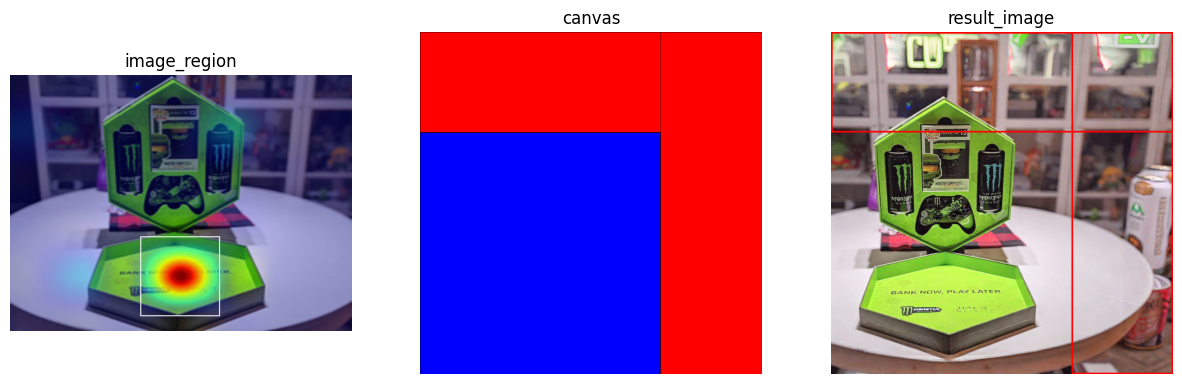

  0%|          | 0/25 [00:00<?, ?it/s]

image: ../input/ad_3.webp, caption: Don't stop play, florence_caption: Halo Infinite Monster Energy drink dispenser


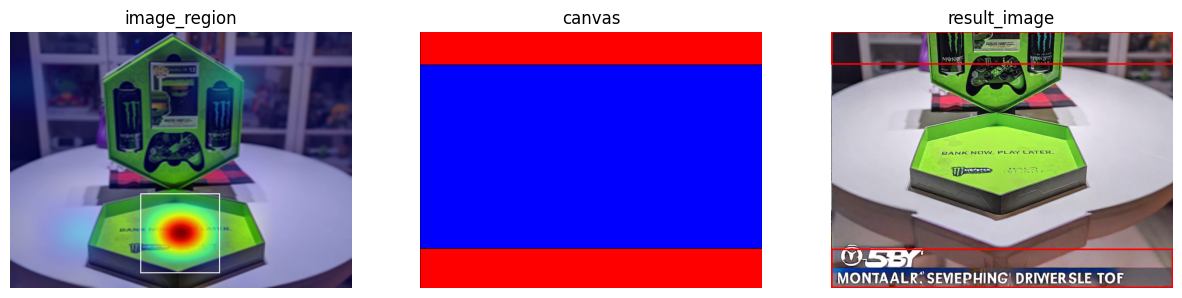

  0%|          | 0/25 [00:00<?, ?it/s]

image: ../input/ad_3.webp, caption: Don't stop play, florence_caption: Halo Infinite Monster Energy drink dispenser


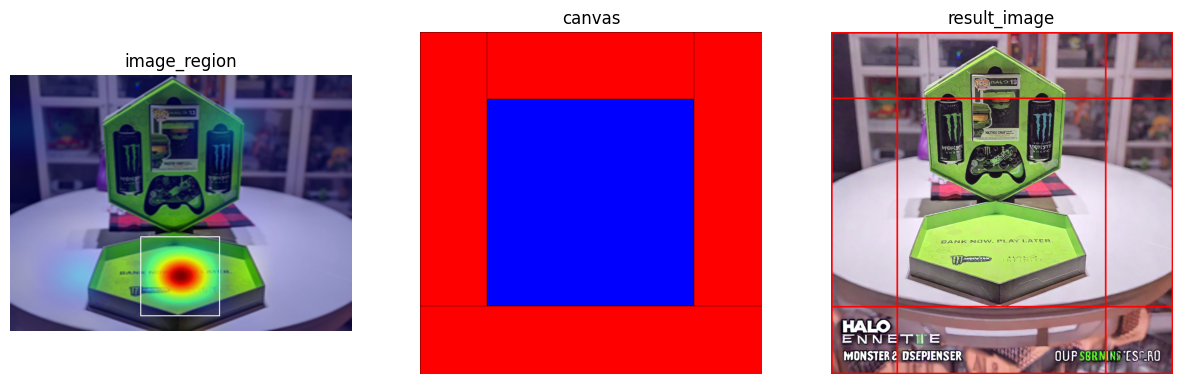

  0%|          | 0/25 [00:00<?, ?it/s]

image: ../input/ad_3.webp, caption: Drink more, Drink better, florence_caption: Halo Infinite Monster Energy drink dispenser


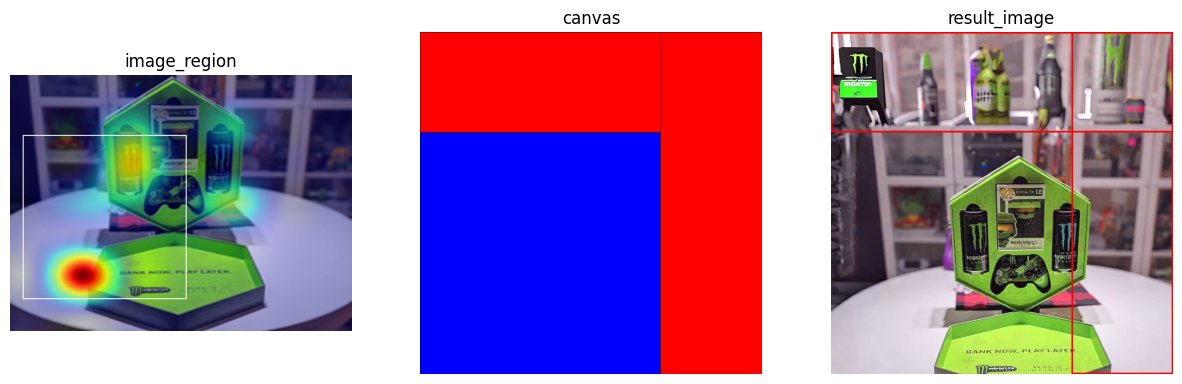

  0%|          | 0/25 [00:00<?, ?it/s]

image: ../input/ad_3.webp, caption: Drink more, Drink better, florence_caption: Halo Infinite Monster Energy drink dispenser


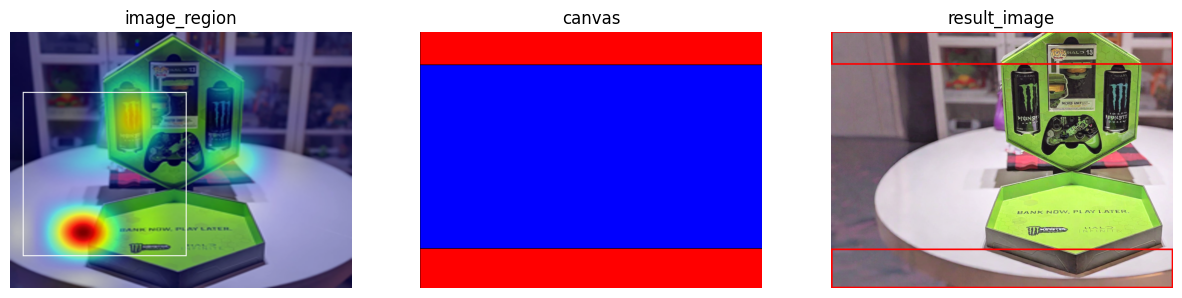

  0%|          | 0/25 [00:00<?, ?it/s]

image: ../input/ad_3.webp, caption: Drink more, Drink better, florence_caption: Halo Infinite Monster Energy drink dispenser


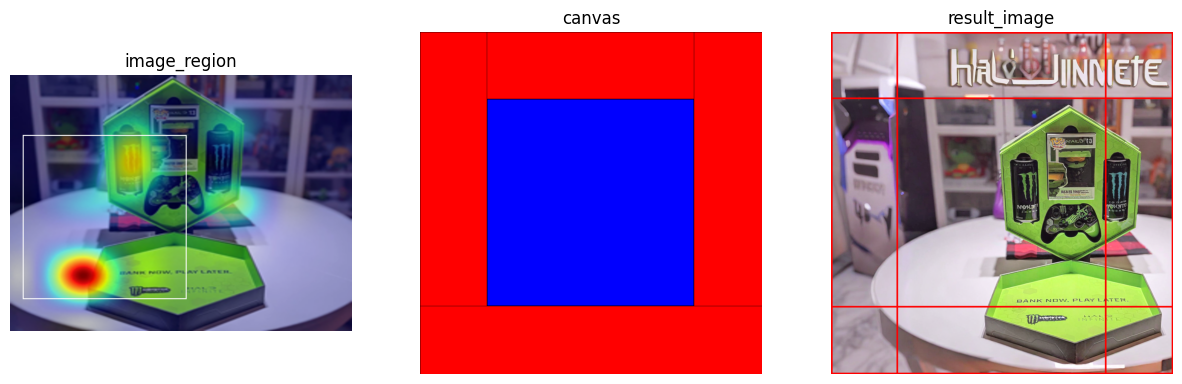

  0%|          | 0/25 [00:00<?, ?it/s]

image: ../input/ad_3.webp, caption: Master Chief, florence_caption: Halo Infinite Monster Energy drink dispenser


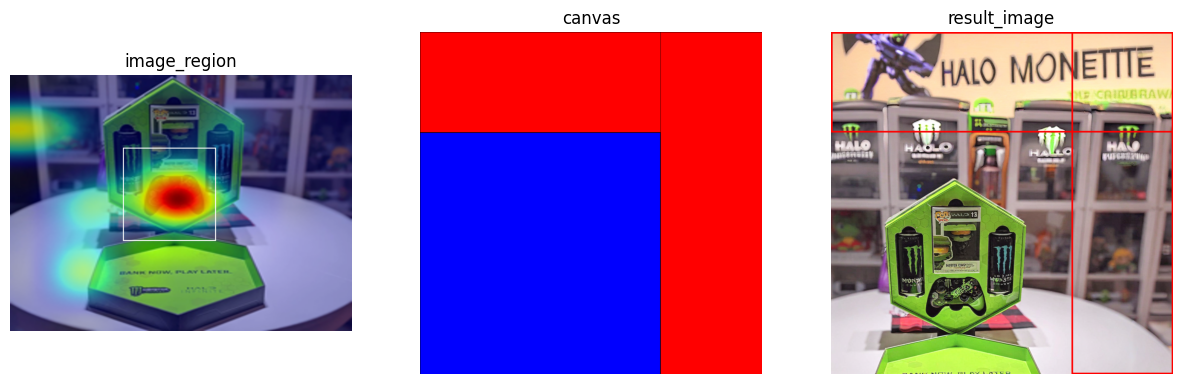

  0%|          | 0/25 [00:00<?, ?it/s]

image: ../input/ad_3.webp, caption: Master Chief, florence_caption: Halo Infinite Monster Energy drink dispenser


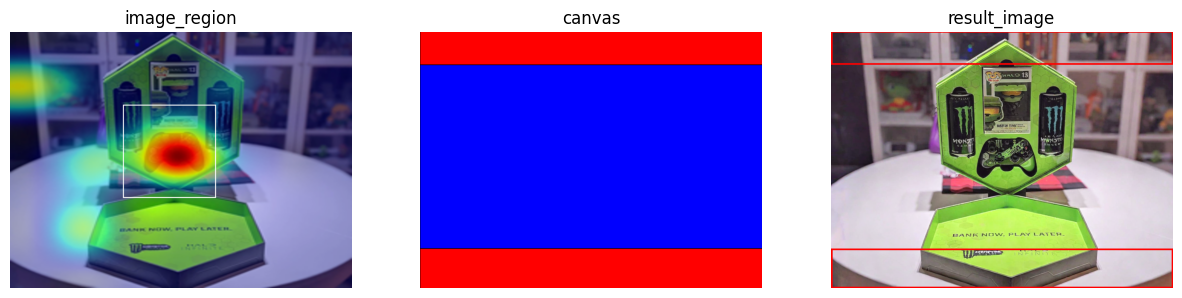

  0%|          | 0/25 [00:00<?, ?it/s]

image: ../input/ad_3.webp, caption: Master Chief, florence_caption: Halo Infinite Monster Energy drink dispenser


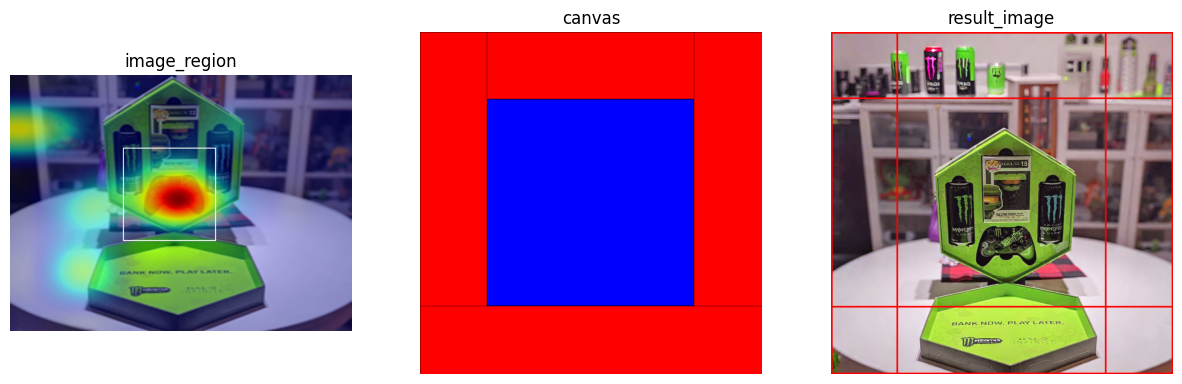

In [4]:
# iterate over the input images,captions and canvas_templates
for i, image_path in enumerate(input_images_list):
    for image_caption in captions[i]:
        for canvas_template in canvas_templates:

            # retrieve the the bb with RoI and the image representing it
            image_region, bb = get_region(
                image_path=image_path,
                image_caption=image_caption,
                clip_arch=clip_arch,
                saliency_layer=saliency_layer,
                blur=blur,
                device=device,
            )
            
            # get the maximal rectangle and the window of the canvas
            canvas_size = canvas_template.canvas_size
            elements = canvas_template.elements
            top_left, bottom_right = maximal_rectangle(canvas_size, elements)
            window = (top_left[0], top_left[1], bottom_right[0], bottom_right[1])

            # a representation of the canvas with the elements
            canvas = Image.new("RGB", canvas_size[1], "white")
            draw = ImageDraw.Draw(canvas)
            for i, element in enumerate(elements):
                draw.rectangle(element, outline="black", fill="red")
            draw.rectangle([top_left, bottom_right], outline="black", fill="blue")

            # extend the image and inpaint the missing region
            original_image = Image.open(image_path).convert("RGB")
            new_pos = new_center(
                image_path=image_path, roi=bb, window=window, canvas_size=canvas_size[1]
            )
            image_extended, mask = extend_image(original_image, new_pos, canvas_size[1])
            
            # get a prompt for the inpaint model using the florence detection model
            image_caption_florence = florence_caption(image_path=image_path)
            # inpaint the missing region
            result_image = impaint_model.inpaint(
                prompt=image_caption_florence,
                image=image_extended,
                mask=mask,
                width=canvas_size[1][0],
                height=canvas_size[1][1],
            )

            # draw the elements for ilustration purposes
            draw = ImageDraw.Draw(result_image)
            for i, element in enumerate(elements):
                draw.rectangle(element, outline="red", width=5)

            print(
                f"image: {image_path}, caption: {image_caption}, florence_caption: {image_caption_florence}"
            )
            # show image_region, canvas and result_image in a single row
            fig, ax = plt.subplots(1, 3, figsize=(15, 5))
            ax[0].imshow(image_region)
            ax[0].set_title("image_region")
            ax[1].imshow(canvas)
            ax[1].set_title("canvas")
            ax[2].imshow(result_image)
            ax[2].set_title("result_image")
            for a in ax:
                a.axis("off")
            plt.show()